Analista - Isabelly Cristine Lopes

Github - https://github.com/isabellylopes

Linkedin - https://www.linkedin.com/in/isabelly-cristine-lopes-8a9b59204/

# Importar bibliotecas

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set_style("dark")

# Obter dados

In [2]:
data = pd.read_csv('dataset/KNN_Project_Data')

In [6]:
data.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


# Análise exploratória de dados

* Use seaborn no DataFrame para criar um pairplot com a tonalidade indicada pela coluna TARGET CLASS.

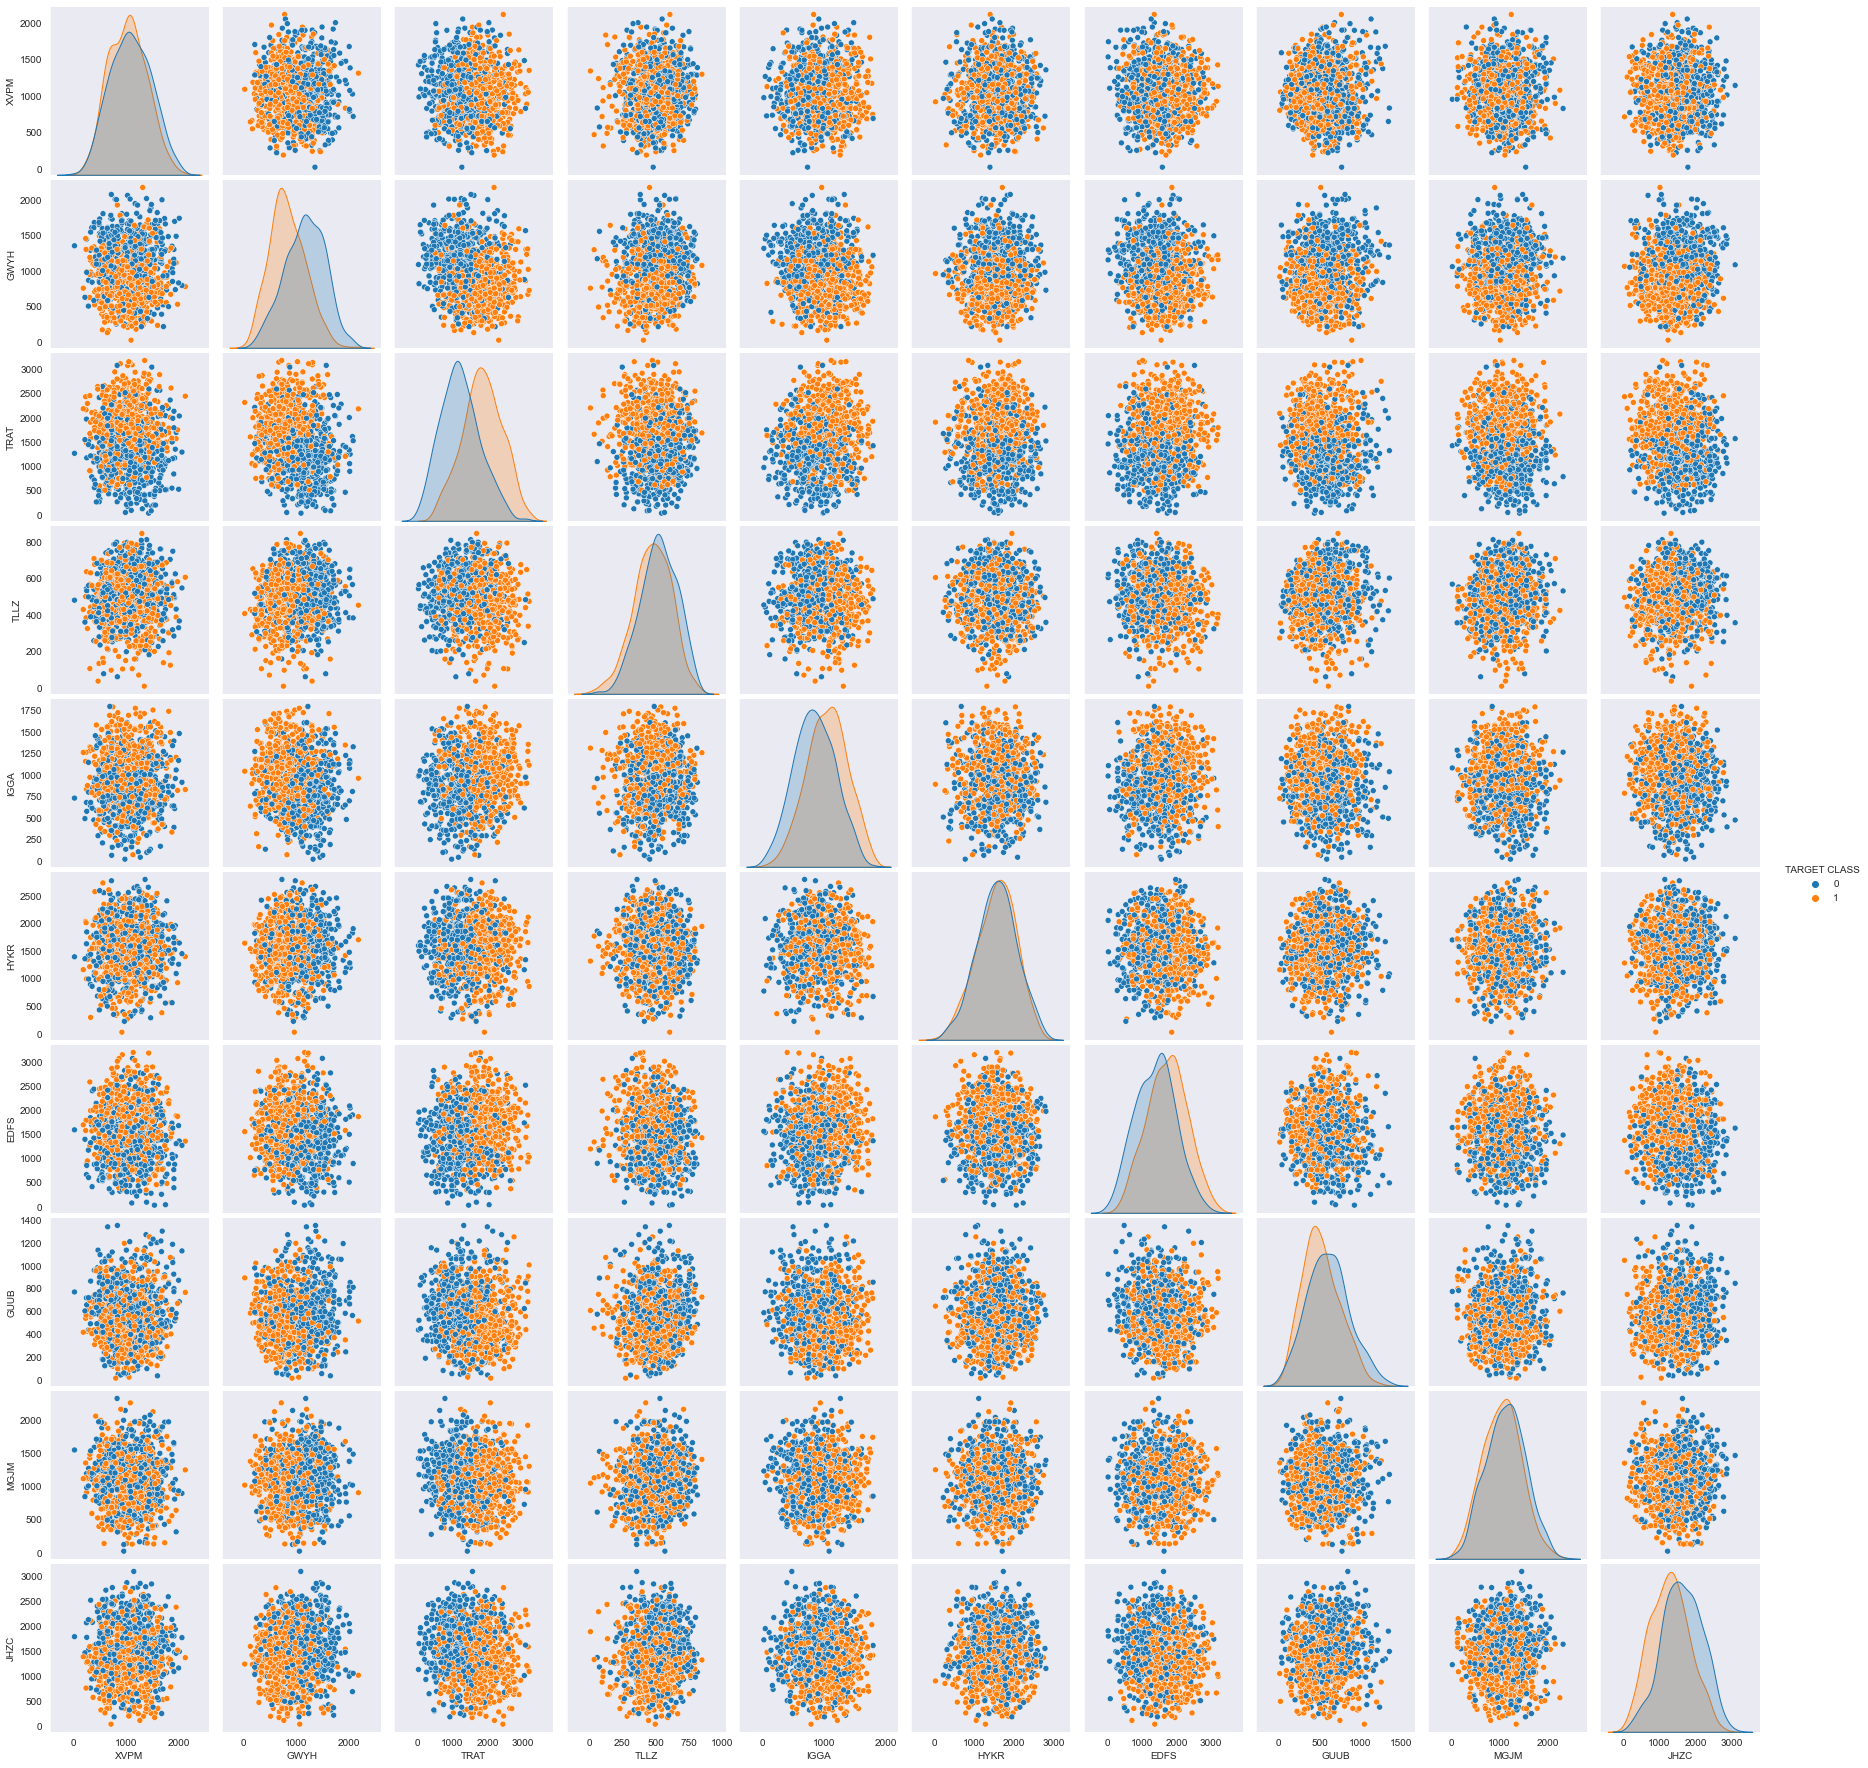

In [9]:
sns.pairplot(data, hue='TARGET CLASS')

# Padronize as variáveis

Hora de para padronizar as variáveis.

* Import StandardScaler do Scikit-learn.

In [3]:
from sklearn.preprocessing import StandardScaler

* Crie um objeto StandardScaler() chamado scaler.

In [4]:
scaler = StandardScaler()

* Use o método fit() do objeto para treinar o modelo.

In [5]:
scaler.fit(data.drop('TARGET CLASS', axis=1))

StandardScaler()

* Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [6]:
data_padronizado = scaler.transform(data.drop('TARGET CLASS', axis=1))

* Converta os parâmetros padronizados em um DataFrame e verifique o cabeçalho desse DataFrame para garantir que a transform() funcionou.

In [7]:
df_parametros = pd.DataFrame(data_padronizado, columns=data.columns[:-1])

In [8]:
df_parametros.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Divisão treino-teste

* Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_parametros, data['TARGET CLASS'], test_size=0.3)

# Usando o KNN
* Importe o KNeighborClassifier do scikit learn.

In [12]:
from sklearn.neighbors import KNeighborsClassifier

* Crie uma instância do modelo KNN com n_neighbors = 1.

In [68]:
knn = KNeighborsClassifier(n_neighbors=1)

* Ajuste este modelo KNN aos dados de treinamento.

In [69]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Previsões e avaliações
Vamos avaliar o nosso modelo KNN!

* Use o método de previsão para prever valores usando seu modelo KNN e X_test.

In [70]:
pred = knn.predict(X_test)

* Crie uma matriz de confusão e um relatório de classificação.

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
 print(confusion_matrix(pred, y_test))

[[113  35]
 [ 46 106]]


Text(70.0, 0.5, 'Verdadeiros Positivos                                Falso Positivo   ')

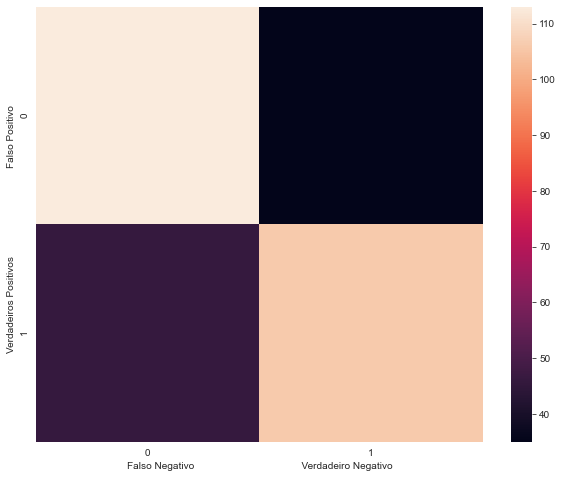

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(pred, y_test))
plt.xlabel('Falso Negativo                                       Verdadeiro Negativo')
plt.ylabel('Verdadeiros Positivos                                Falso Positivo   ')

In [18]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.71      0.76      0.74       148
           1       0.75      0.70      0.72       152

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300



# Escolhendo o valor K

Vamos continuar usando o método do cotovelo para escolher um bom valor K!

* Crie um loop for que treine vários modelos KNN com valores k diferentes e, em seguida, mantenha um registro do error_rate para cada um desses modelos com uma lista. Vamos ver qual o melhor valor de K.

In [51]:
taxa_erro = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    taxa_erro.append(np.mean(pred!=y_test))

* Agora crie o seguinte gráfico usando as informações do seu loop.

Text(0.5, 1.0, 'Taxa de erro vs K')

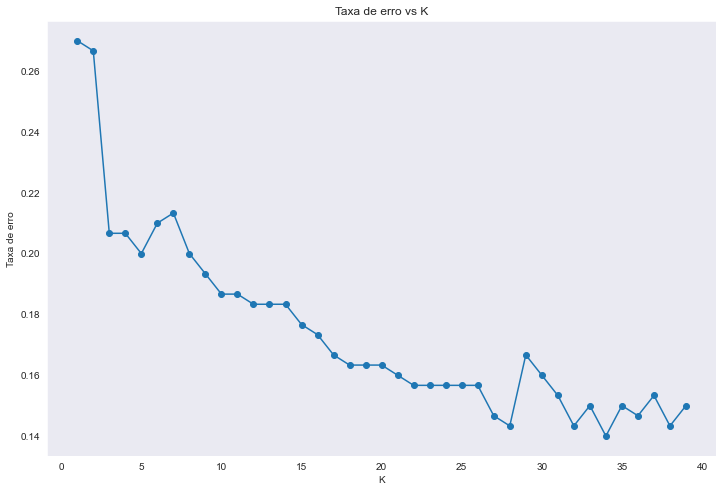

In [59]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40), taxa_erro, marker='o')
plt.xlabel('K')
plt.ylabel('Taxa de erro')
plt.title('Taxa de erro vs K')

* Vemos que quando o número de K é próximo de 30, sua taxa de erro é menor. Então vamos refazer!

In [73]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)


In [74]:
print(confusion_matrix(pred, y_test))

[[129  18]
 [ 30 123]]


In [66]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       147
           1       0.87      0.80      0.84       153

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

